# EYE DETECTION

In [4]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D 
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.12.0


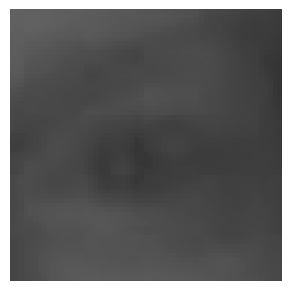

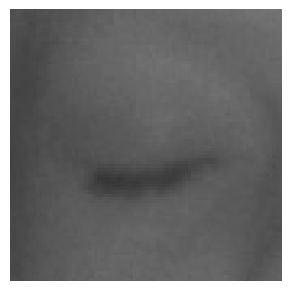

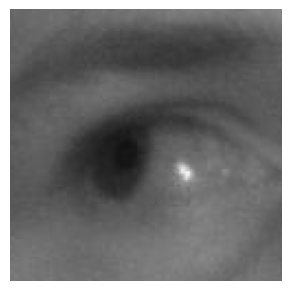

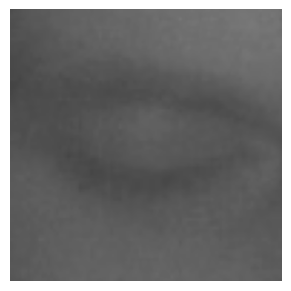

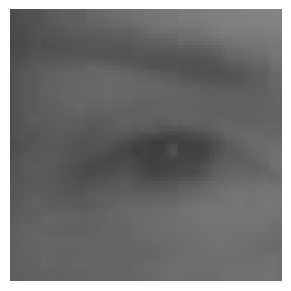

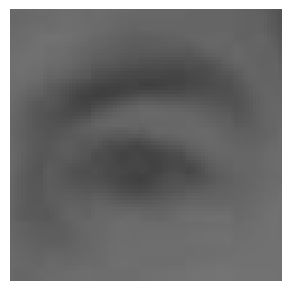

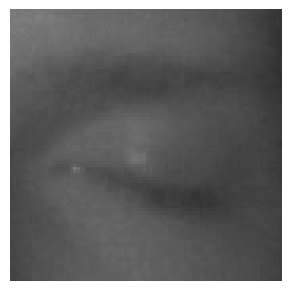

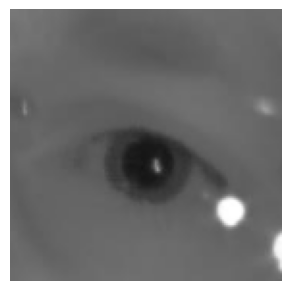

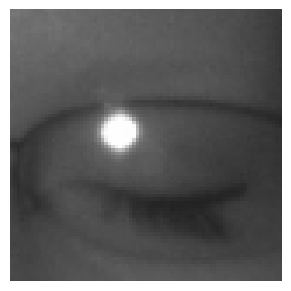

In [5]:
images = glob("/kaggle/input/mrl-eye-dataset/data/train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

**Preparing data for training**

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip = True)
train_generator = datagen_train.flow_from_directory("/kaggle/input/mrl-eye-dataset/data/train/",
                                                    target_size=(img_size, img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode="categorical",
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip = True)
validation_generator = datagen_train.flow_from_directory("/kaggle/input/mrl-eye-dataset/data/test/",
                                                              target_size=(img_size, img_size),
                                                              color_mode="grayscale",
                                                              batch_size=batch_size,
                                                              class_mode="categorical",
                                                              shuffle=True)

Found 81675 images belonging to 2 classes.
Found 3223 images belonging to 2 classes.


In [7]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x   

In [8]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [9]:
 def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,64,(3,3))
    conv_2 = Convolution(inputs,128,(5,5))
    conv_3 = Convolution(inputs,512,(3,3))
    conv_4 = Convolution(inputs,512,(3,3))
    
    
    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)
    dense_2 = Dense_f(dense_1,512)
    
    output = Dense(2,activation = "softmax")(dense_1)
    model = Model(inputs = [inputs], outputs = [output])
    
    opt = Adam(lr=0.0005)
    
    model.compile(loss = ['categorical_crossentropy'], optimizer = opt , metrics = ['accuracy'])
    
    return model

In [10]:
model = model_fer((48,48,1))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 512)       5120      
                                                                 
 batch_normalization_2 (Batc  (None, 48, 48, 512)      2048      
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 48, 48, 512)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 512)      0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 512)       0     

**Initializing Model**

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = model_fer((48,48,1))
epochs = 15
steps_per_epoch = train_generator.n //train_generator.batch_size
validation_steps = validation_generator.n //validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=-1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor =0.1, patience =2, min_lr=0.00001)


callbacks = [checkpoint,reduce_lr]

 # TRAINING THE MODEL

In [12]:
from tensorflow.keras.models import Model

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)

Epoch 1/15


2023-06-18 19:29:13.508044: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/dropout_8/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1276/1276 [==============================] - 222s 168ms/step - loss: 0.1876 - accuracy: 0.9298 - val_loss: 1.3509 - val_accuracy: 0.5428 - lr: 0.0010
Epoch 2/15
1276/1276 [==============================] - 80s 63ms/step - loss: 0.1159 - accuracy: 0.9584 - val_loss: 1.4023 - val_accuracy: 0.5312 - lr: 0.0010
Epoch 3/15
1276/1276 [==============================] - 79s 62ms/step - loss: 0.0972 - accuracy: 0.9654 - val_loss: 1.0556 - val_accuracy: 0.6569 - lr: 0.0010
Epoch 4/15
1276/1276 [==============================] - 78s 61ms/step - loss: 0.0851 - accuracy: 0.9694 - val_loss: 0.4485 - val_accuracy: 0.8319 - lr: 0.0010
Epoch 5/15
1276/1276 [==============================] - 79s 62ms/step - loss: 0.0755 - accuracy: 0.9732 - val_loss: 1.4192 - val_accuracy: 0.5994 - lr: 0.0010
Epoch 6/15
1276/1276 [==============================] - 78s 61ms/step - loss: 0.0704 - accuracy: 0.9744 - val_loss: 0.6177 - val_accuracy: 0.7538 - lr: 0.0010
Epoch 7/15
1276/1276 [==============================] -

**Model Evaluation**

In [13]:
model.evaluate(validation_generator)

51/51 [==============================] - 3s 52ms/step - loss: 0.4355 - accuracy: 0.8647


[0.4354943037033081, 0.8647223114967346]

**Plotting Loss**

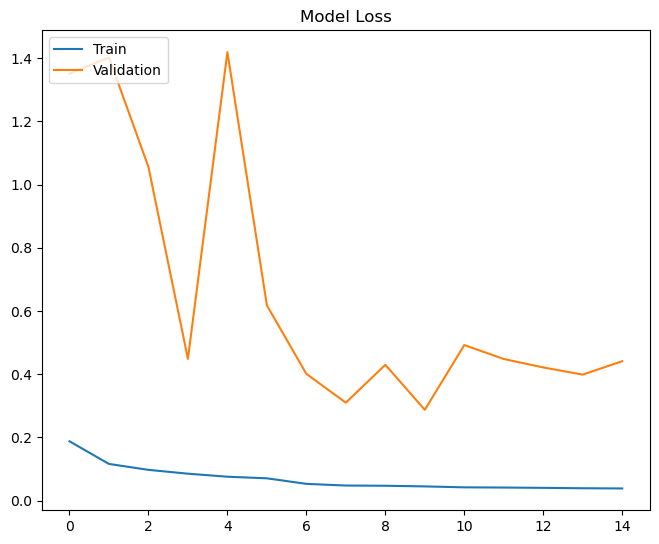

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)
plt.show()

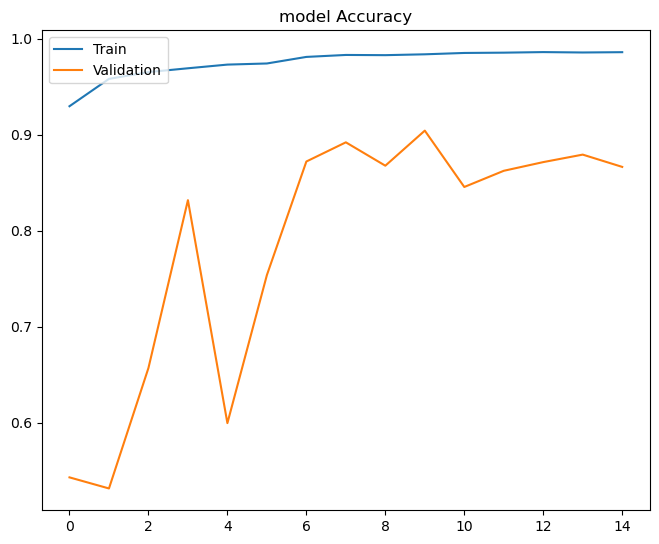

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)
plt.show()

**Saving Model Architechture**

In [16]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)

In [17]:
model.save('/kaggle/working/model_weights.h5')

